<a href="https://colab.research.google.com/github/malvibid/COMP3029-Computer-Vision/blob/main/COMP3029_Computer_Vision_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP3029 COMPUTER VISION COURSEWORK** 

*Spring 2022/2023*, School of Computer Science, University of Nottingham Malaysia

```
GROUP 4: 
  20306551 - Mustafa Mehmood
  20311657 - Omar Ismail
  20311860 - Gabriel Hoh Chao Jei
  20187945 - Malvi Bid
```





# ⚡Challenges

```
Key: ✅ Challenge solved 🟥 Pending solution
```

*   🟥 Size of the bounding box to extract an individual seed from Batch 2 and 3 is not equal. In order to address this:
   - We used the `torchvision.transforms.Resize` method to resize the extracted seed image region to 256px by 256px, like the images in Batch 1. However, this produces some blanks 🥴. For example, see Visualise batches section - output of the [Test B3 batch](#scrollTo=coQAUVW5FZcQ&line=1&uniqifier=1).
  - Extracted/Segmented the Batch-2 and Batch-3 images and saved the segmented image to a folder. We are also resizing the cropped images. This process also produces blank images for Batch-3. Thus, to identify the issue we'll first crop the images, without resizing them and then observe the extracted images to decide on further action.



# Import Dependencies

In [1]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.utils as vutils
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from google.colab import drive

# Mount google drive

In [2]:
# Mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Dataset folder structure

In [3]:
!ls -F '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/'

Batch-1/  Batch-2/  Batch-3/


In [30]:
print("Batch-1/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1'
print("\nBatch-2/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-2'
print("\nBatch-3/ ")
!ls -F -X '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-3'

Batch-1/ 
seedsegment@  seedsplit@

Batch-2/ 
NormalRoomLighting@  seedsegment/  NormalRoomLight_annotation.csv

Batch-3/ 
LightBox@  seedsegment/  LightBox_annotation.csv


## Dataset structure tree

### Original tree


```
.
└── Datasets/
    ├── Batch-1/
    │   └── seedsegment/
    │       ├── test/
    │       │   ├── BadSeed/
    │       │   │   ├── badtest0.png
    │       │   │   ├── badtest1.png
    │       │   │   └── ...
    │       │   └── GoodSeed/
    │       │       ├── goodtest0.png
    │       │       ├── goodtest1.png
    │       │       └── ...
    │       └── train/
    │           ├── BadSeed/
    │           │   ├── badtrain0.png
    │           │   ├── badtrain1.png
    │           │   └── ...
    │           └── GoodSeed/
    │               ├── goodtrain0.png
    │               ├── goodtrain1.png
    │               └── ...
    ├── Batch-2/
    │   ├── NormalRoomLight_annotation.csv
    │   └── NormalRoomLighting/
    │       ├── Set1/
    │       │   ├── Line_Bad_Seeds(s1).JPG
    │       │   ├── Line_Bad_Seeds(s1).xml
    │       │   ├── Line_Good_Seeds(s1).JPG
    │       │   ├── Line_Good_Seeds(s1).xml
    │       │   ├── Line_Mix(s1).JPG
    │       │   ├── Line_Mix(s1).xml
    │       │   ├── SpaceOutRandom_Bad_Seeds(s1).JPG
    │       │   ├── SpaceOutRandom_Bad_Seeds(s1).xml
    │       │   ├── SpaceOutRandom_Good_Seeds(s1).JPG
    │       │   ├── SpaceOutRandom_Good_Seeds(s1).xml
    │       │   ├── SpaceOutRandom_Mix(s1).JPG
    │       │   └── SpaceOutRandom_Mix(s1).xml
    │       ├── ...
    │       └── Set15/
    │           ├── Line_Bad_Seeds(s15).JPG
    │           ├── Line_Bad_Seeds(s15).xml
    │           ├── Line_Good_Seeds(s15).JPG
    │           ├── Line_Good_Seeds(s15).xml
    │           ├── Line_Mix(s15).JPG
    │           ├── Line_Mix(s15).xml
    │           ├── SpaceOutRandom_Bad_Seeds(s15).JPG
    │           ├── SpaceOutRandom_Bad_Seeds(s15).xml
    │           ├── SpaceOutRandom_Good_Seeds(s15).JPG
    │           ├── SpaceOutRandom_Good_Seeds(s15).xml
    │           ├── SpaceOutRandom_Mix(s15).JPG
    │           └── SpaceOutRandom_Mix(s15).xml
    └── Batch-3/
        ├── LightBox_annotation.csv
        └── LightBox/
            ├── Set1/
            │   ├── Line_Bad_Seeds(s1).JPG
            │   ├── Line_Bad_Seeds(s1).xml
            │   ├── Line_Good_Seeds(s1).JPG
            │   ├── Line_Good_Seeds(s1).xml
            │   ├── Line_Mix(s1).JPG
            │   ├── Line_Mix(s1).xml
            │   ├── SpaceOutRandom_Bad_Seeds(s1).JPG
            │   ├── SpaceOutRandom_Bad_Seeds(s1).xml
            │   ├── SpaceOutRandom_Good_Seeds(s1).JPG
            │   ├── SpaceOutRandom_Good_Seeds(s1).xml
            │   ├── SpaceOutRandom_Mix(s1).JPG
            │   └── SpaceOutRandom_Mix(s1).xml
            ├── ...
            └── Set20/
                ├── Line_Bad_Seeds(s20).JPG
                ├── Line_Bad_Seeds(s20).xml
                ├── Line_Good_Seeds(s20).JPG
                ├── Line_Good_Seeds(s20).xml
                ├── Line_Mix(s20).JPG
                ├── Line_Mix(s20).xml
                ├── SpaceOutRandom_Bad_Seeds(s20).JPG
                ├── SpaceOutRandom_Bad_Seeds(s20).xml
                ├── SpaceOutRandom_Good_Seeds(s20).JPG
                ├── SpaceOutRandom_Good_Seeds(s20).xml
                ├── SpaceOutRandom_Mix(s20).JPG
                └── SpaceOutRandom_Mix(s20).xml
```

### Tree after extracting Batch-2 and Batch-3



```
└── Datasets/
    ├── Batch-1/
    │   └── seedsegment/
    │       ├── test/
    │       │   ├── BadSeed/
    │       │   │   ├── badtest0.png
    │       │   │   ├── badtest1.png
    │       │   │   └── ...
    │       │   └── GoodSeed/
    │       │       ├── goodtest0.png
    │       │       ├── goodtest1.png
    │       │       └── ...
    │       └── train/
    │           ├── BadSeed/
    │           │   ├── badtrain0.png
    │           │   ├── badtrain1.png
    │           │   └── ...
    │           └── GoodSeed/
    │               ├── goodtrain0.png
    │               ├── goodtrain1.png
    │               └── ...
    ├── Batch-2/
    │   └── seedsegment/
    │       └── test/
    │           ├── BadSeed/
    │           │   ├── badtest12.png
    │           │   ├── badtest13.png
    │           │   └── ...
    │           └── GoodSeed/
    │               ├── goodtest0.png
    │               ├── goodtest1.png
    │               └── ...
    └── Batch-3/
        └── seedsegment/
            └── test/
                ├── BadSeed/
                │   ├── badtest12.png
                │   ├── badtest13.png
                │   └── ...
                └── GoodSeed/
                    ├── goodtest0.png
                    ├── goodtest1.png
                    └── ...
  ```

# Extracting Batch-2 and Batch-3 individual seed images

The individual seed images have been extracted in folders as per the [folder structure](#scrollTo=N7skd4hymIFJ&line=46&uniqifier=1) defined in the dataset folder structure section above.

In [5]:
def extract_seed_image(annotations_csv):
  print("Extracting images...")
  # Read the CSV file
  seed_df = pd.read_csv(annotations_csv)

  for index, row in seed_df.iterrows():
    # Get all image variables
    img_path = row["file_name"].rsplit('.')[0] + '.JPG'
    x_min, y_min, x_max, y_max = row["x_min"], row["y_min"], row["x_max"], row["y_max"]
    class_label = 'GoodSeed' if row["bbox_label"] == 'GOOD' else 'BadSeed' if row["bbox_label"] == 'BAD' else 'Labelling error' # Ensuring each sample in the csv is labelled correctly.
    
    # Read the image file
    image = Image.open(img_path)

    # Crop the image using the given bounds
    cropped_image = image.crop((x_min, y_min, x_max, y_max))

    # Resize the cropped image to 256x256
    resized_image = cropped_image.resize((256, 256), Image.ANTIALIAS)
    
    # Formatting the image name to <label>test<index>.jpg E.g., goodtest0.jpg, badtest12.jpg
    image_name = f'{row["bbox_label"].lower()}test{index}.jpg' 
    
    # Specify path to save the extracted image. Batch-<num>/seedsegment/test/<class-cabel>
    data_dir = os.path.join(os.path.dirname(annotations_csv) , f'seedsegment/test/{class_label}')

    # Create new folders if they don't exist on the path
    if not os.path.exists(data_dir):
      os.makedirs(data_dir)

    # Save the extracted image to specified folder E.g. Batch-2/seedsegment/test/GoodSeed/goodtest0.jpg
    resized_image.save(f'{data_dir}/{image_name}')

  print(f'Extracted images saved at: {os.path.dirname(data_dir)}/')
  print("✅ Individual seed image extraction completed.")


In [6]:
# Setting paths to the dataset and annotation files
dataset_root_dir = '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/'

batch2_annotations_dir = os.path.join(dataset_root_dir, 'Batch-2/NormalRoomLight_annotation.csv')
batch3_annotations_dir = os.path.join(dataset_root_dir, 'Batch-3/LightBox_annotation.csv')

In [7]:
# Extract Batch-2 images
extract_seed_image(batch2_annotations_dir)

Extracting images...
Extracted images saved at: /content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-2/seedsegment/test/
✅ Individual seed image extraction completed.


In [8]:
# Extract Batch-3 images
extract_seed_image(batch3_annotations_dir)

Extracting images...
Extracted images saved at: /content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-3/seedsegment/test/
✅ Individual seed image extraction completed.


# Custom Seed Dataset and Dataloader


In [18]:
# Custom dataset class inheriting from the PyTorch Dataset class
class SeedDataset(Dataset):
    def __init__(self, dataset_dir=None, train=True, transform=None):
        self.dataset_dir = dataset_dir
        self.train = train
        self.transform = transform
        self.categories = ['BadSeed', 'GoodSeed']
                
        self.data = []
        
        data_dir = os.path.join(self.dataset_dir, 'train' if self.train else 'test')
        for category_idx, category in enumerate(self.categories):
          category_dir = os.path.join(data_dir, category)
          for img_name in os.listdir(category_dir):
              if img_name.endswith('.png') or img_name.endswith('.jpg'):
                  self.data.append((img_name, os.path.join(category_dir, img_name), category_idx))
        
        #print(self.data)
                    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
      
      img_name, img_path, label = self.data[idx]
      seed_img = Image.open(img_path).convert('RGB')
      
      if self.transform:
          seed_img = self.transform(seed_img)

      return img_name, seed_img, label

In [10]:
# Defining paths to dataset directories
batch1_dataset_dir = os.path.join(dataset_root_dir, 'Batch-1/seedsegment')
batch2_dataset_dir = os.path.join(dataset_root_dir, 'Batch-2/seedsegment')
batch3_dataset_dir = os.path.join(dataset_root_dir, 'Batch-3/seedsegment')

In [11]:
# Define the image transformations
image_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [12]:
# Define batch size
BATCH_SIZE = 32

In [21]:
# Instantiate the custom SeedDataset and dataloader
train_dataset = SeedDataset(dataset_dir=batch1_dataset_dir, train=True, transform=image_transforms)
test_batch1_dataset = SeedDataset(dataset_dir=batch1_dataset_dir, train=False, transform=image_transforms)
test_batch2_dataset = SeedDataset(dataset_dir=batch2_dataset_dir, train=False, transform=image_transforms)
test_batch3_dataset = SeedDataset(dataset_dir=batch3_dataset_dir, train=False, transform=image_transforms)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_batch1_dataloader = DataLoader(dataset=test_batch1_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_batch2_dataloader = DataLoader(dataset=test_batch2_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_batch3_dataloader = DataLoader(dataset=test_batch3_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

## Testing dataset and dataloader

In [22]:
# Checking the dataset length and a sample of data
print(f"B1 Train Dataset length: {len(train_dataset.data)}")
print(f"B1 Train Data sample: {train_dataset.data[0]}\n")

print(f"B1 Test Dataset length: {len(test_batch1_dataset.data)}")
print(f"B1 Test Data sample: {test_batch1_dataset.data[0]}\n")

print(f"B2 Test Dataset length: {len(test_batch2_dataset.data)}")
print(f"B2 Test Data sample: {test_batch2_dataset.data[0]}\n")

print(f"B3 Test Dataset length: {len(test_batch3_dataset.data)}")
print(f"B3 Test Data sample: {test_batch3_dataset.data[0]}\n")

B1 Train Dataset length: 1752
B1 Train Data sample: ('badtrain0.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/train/BadSeed/badtrain0.png', 0)

B1 Test Dataset length: 401
B1 Test Data sample: ('badtest2.png', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-1/seedsegment/test/BadSeed/badtest2.png', 0)

B2 Test Dataset length: 900
B2 Test Data sample: ('badtest10.jpg', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-2/seedsegment/test/BadSeed/badtest10.jpg', 0)

B3 Test Dataset length: 1198
B3 Test Data sample: ('badtest10.jpg', '/content/drive/My Drive/UNM/COMP3029-Computer-Vision-Labs/Coursework/Datasets/Batch-3/seedsegment/test/BadSeed/badtest10.jpg', 0)



In [23]:
# Get a batch of data from the data loader
train_img_names, train_images, train_labels = next(iter(train_dataloader))
b1_test_img_names, b1_test_images, b1_test_labels = next(iter(test_batch1_dataloader))
b2_test_img_names, b2_test_images, b2_test_labels = next(iter(test_batch2_dataloader))
b3_test_img_names, b3_test_images, b3_test_labels = next(iter(test_batch3_dataloader))

### Visualise batches

Train image batch shape: torch.Size([32, 3, 256, 256])
Train labels batch shape: torch.Size([32])
Train labels: tensor([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1])


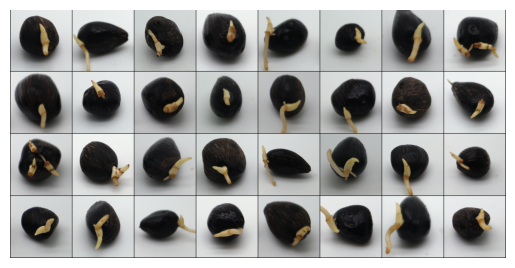

In [24]:
# Train batch
print(f"Train image batch shape: {train_images.size()}")
print(f"Train labels batch shape: {train_labels.size()}")
print(f"Train labels: {train_labels}")

# Create a grid of images from the batch to see the individual seed samples
grid = vutils.make_grid(train_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

B1 Test image batch shape: torch.Size([32, 3, 256, 256])
B1 Test labels batch shape: torch.Size([32])
B1 Test Labels: tensor([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0])


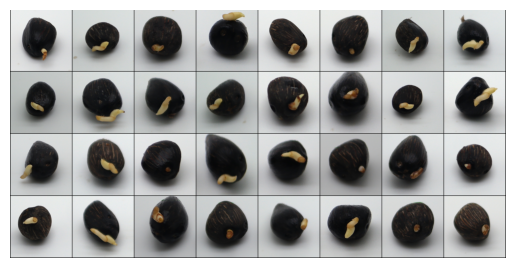

In [25]:
# Test B1
print(f"B1 Test image batch shape: {b1_test_images.size()}")
print(f"B1 Test labels batch shape: {b1_test_labels.size()}")
print(f"B1 Test Labels: {b1_test_labels}")

# Create a grid of images from the batch to see the individual seed samples
grid = vutils.make_grid(b1_test_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

B2 Test image batch shape: torch.Size([32, 3, 256, 256])
B2 Test labels batch shape: torch.Size([32])
B2 Test Labels: tensor([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 0])


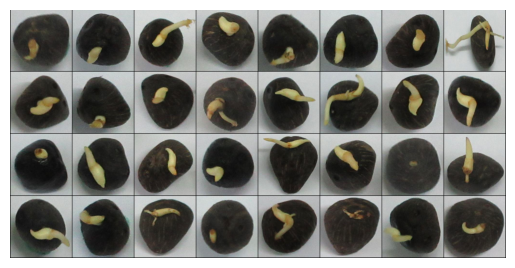

In [26]:
# Test B2
print(f"B2 Test image batch shape: {b2_test_images.size()}")
print(f"B2 Test labels batch shape: {b2_test_labels.size()}")
print(f"B2 Test Labels: {b2_test_labels}")

# Create a grid of images from the batch to see the individual seed samples
grid = vutils.make_grid(b2_test_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()

B3 Test image batch shape: torch.Size([32, 3, 256, 256])
B3 Test labels batch shape: torch.Size([32])
B3 Test Labels: tensor([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 0])


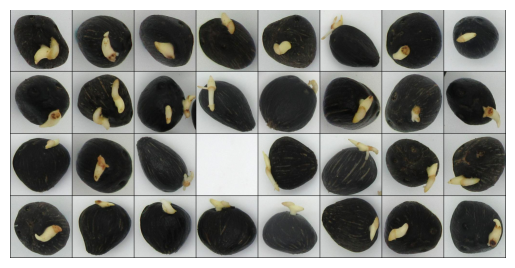

In [27]:
# Test B3
print(f"B3 Test image batch shape: {b3_test_images.size()}")
print(f"B3 Test labels batch shape: {b3_test_labels.size()}")
print(f"B3 Test Labels: {b3_test_labels}")
# Create a grid of images from the batch to see the individual seed sample
grid = vutils.make_grid(b3_test_images, nrow=8, padding=2, normalize=True)

# Display the grid
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()